# Importing python packages

In [1]:
import glob
from multiprocessing import Pool
import time
from tqdm import tqdm
import pandas as pd

# Importing SSPARQ setup

In [2]:
from parameters_py.config import (
					WAVEFORM_DIR,CATALOG_FILE,XML_DIR,SSPARQ_OUTPUT,num_processes
				   )

Reading configuration file: ./config_file.cnf


# Importing SSPARQ functions

In [3]:
from src.analysis import (
					aic_simple,find_orientation,Braunmiller_Pornsopin_algorithm,calculate_metrics
				   )

from src.utils import (
					quakeml_to_dataframe,moment_tensor_to_nodal_planes,calculate_plunge,mecclass,adjust_baz_for_ZEN,rms,energy
				   )

from src.plot import (
					plotting_event_orientation
				   )

# Main program

### Reading station

In [4]:
STATIONS_xml = sorted(glob.glob(XML_DIR+'*'))
STATIONS_xml = STATIONS_xml

STATIONS_lst = [i.split('/')[-1].split('.xml')[0] for i in STATIONS_xml]

print('Number of stations:',len(STATIONS_lst))

Number of stations: 2


### Running multiprocessing function given a input list

Processsing station:  G.DRV


 53%|█████████████████████▊                   | 155/292 [00:24<00:23,  5.78it/s]/home/sysop/Programs/anaconda3/lib/python3.12/site-packages/obspy/imaging/beachball.py:48: UserWarning: Encountered an exception while plotting the beachball. Falling back to the mopad wrapper which is slower but more stable.
  warnings.warn(msg)
 57%|███████████████████████▏                 | 165/292 [00:26<00:17,  7.12it/s]

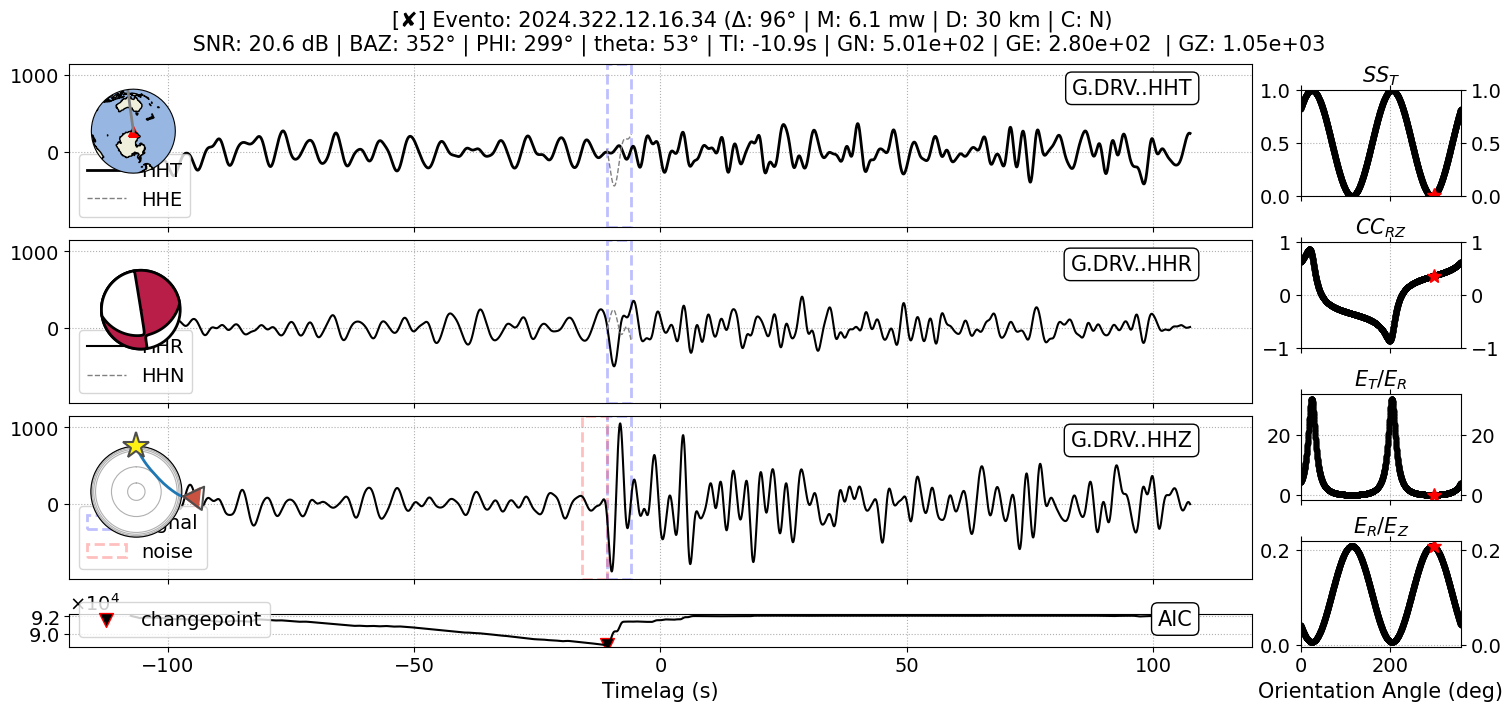

 65%|██████████████████████████▌              | 189/292 [00:29<00:12,  8.48it/s]

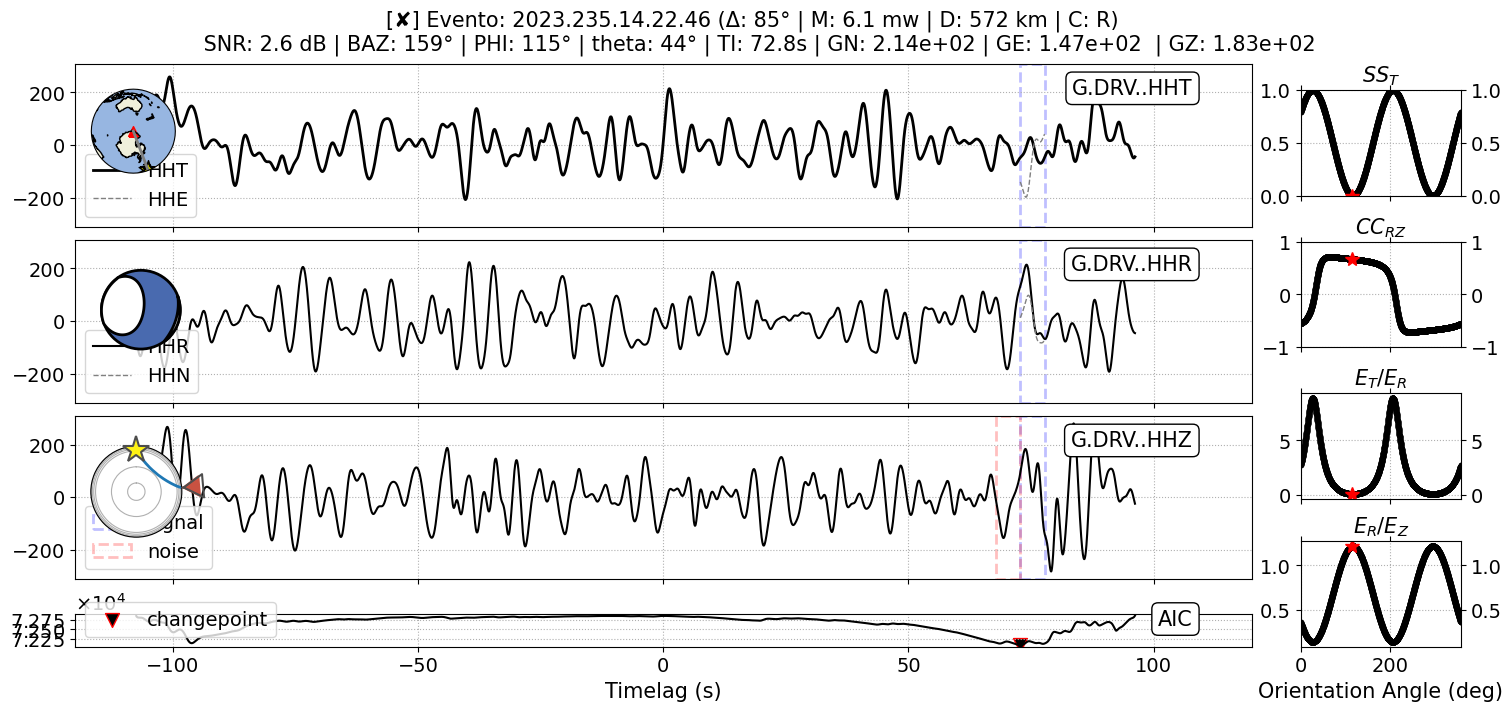

 72%|█████████████████████████████▎           | 209/292 [00:32<00:13,  6.30it/s]

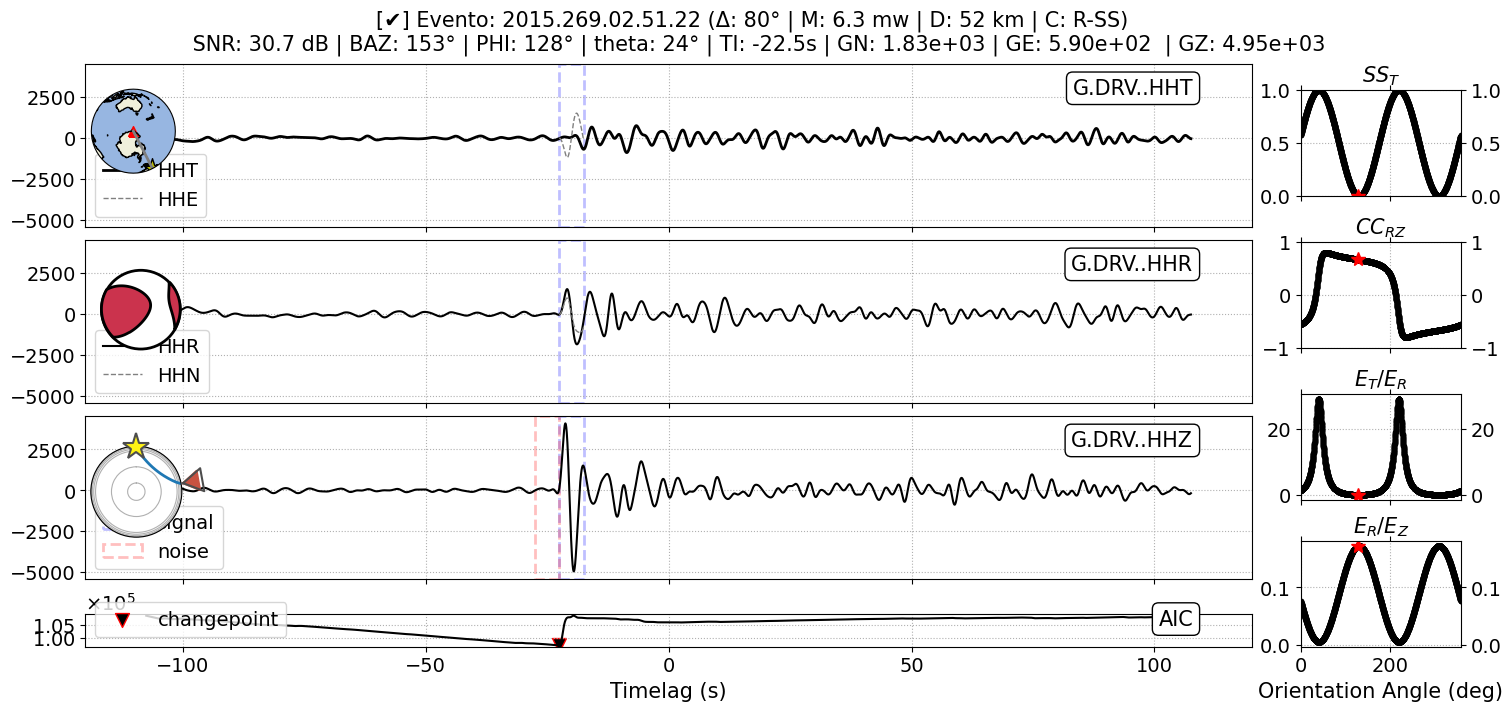

 78%|███████████████████████████████▊         | 227/292 [00:35<00:12,  5.25it/s]

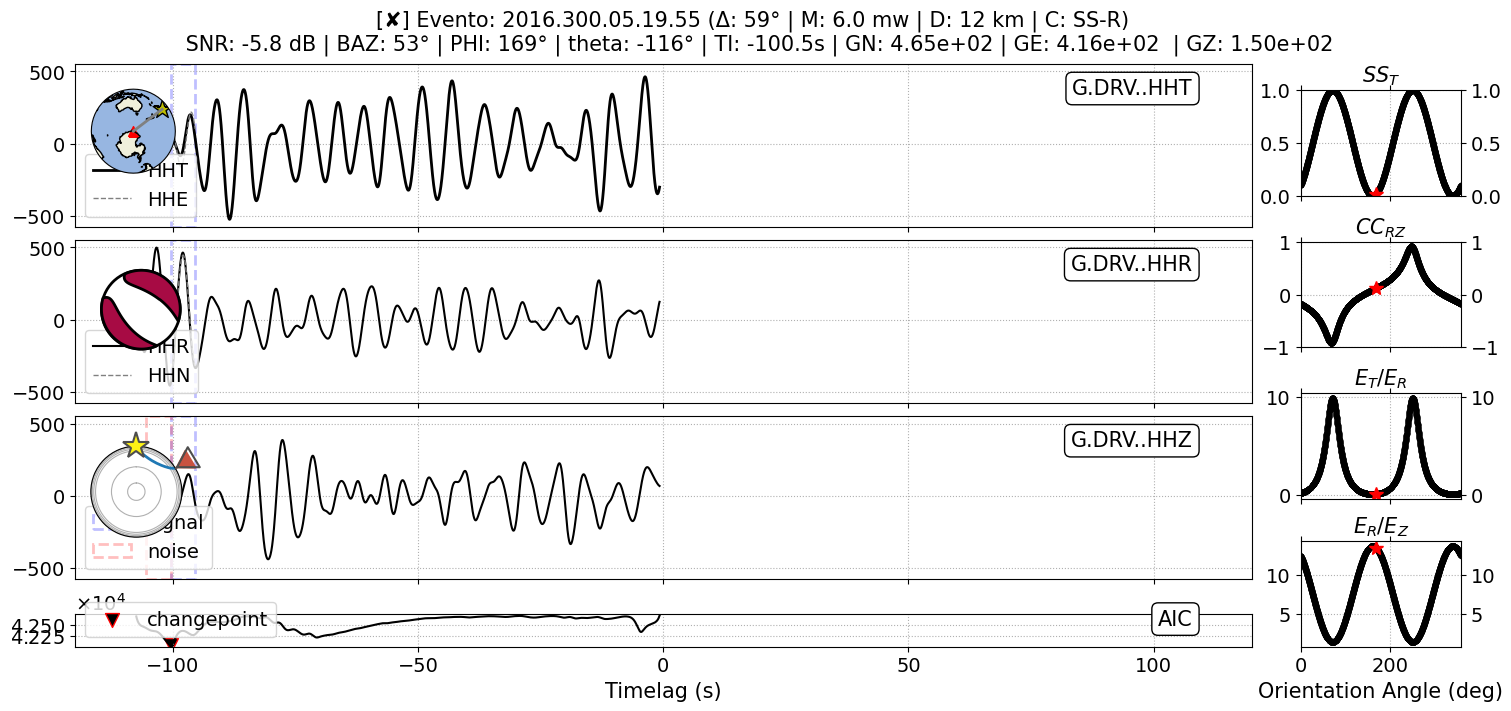

 85%|██████████████████████████████████▉      | 249/292 [00:38<00:09,  4.52it/s]

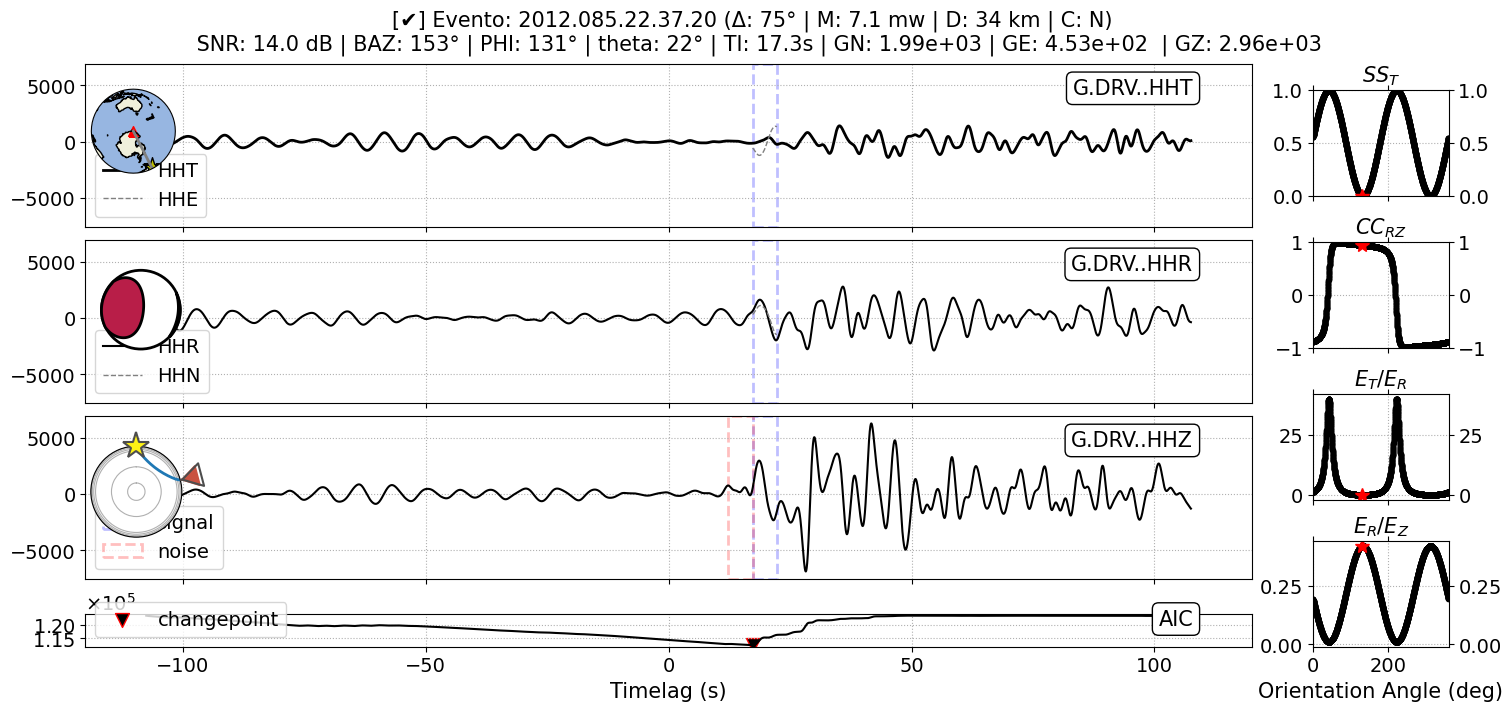

 92%|█████████████████████████████████████▉   | 270/292 [00:42<00:05,  4.29it/s]

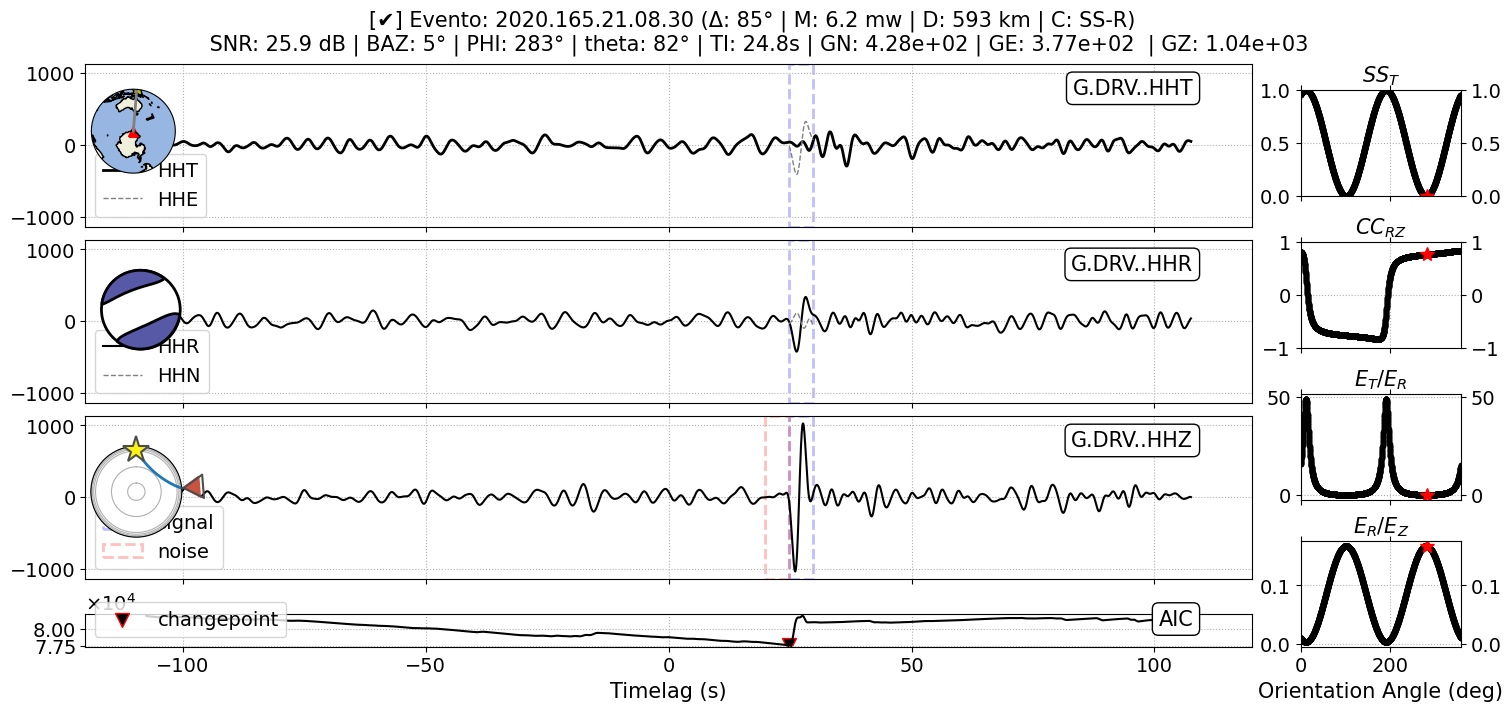

100%|█████████████████████████████████████████| 292/292 [00:44<00:00,  6.57it/s]


Processsing station:  US.MVCO


 56%|██████████████████████▌                 | 628/1113 [01:49<00:56,  8.60it/s]/home/sysop/Programs/anaconda3/lib/python3.12/site-packages/obspy/imaging/beachball.py:48: UserWarning: Encountered an exception while plotting the beachball. Falling back to the mopad wrapper which is slower but more stable.
  warnings.warn(msg)
 57%|██████████████████████▉                 | 637/1113 [01:50<01:30,  5.26it/s]

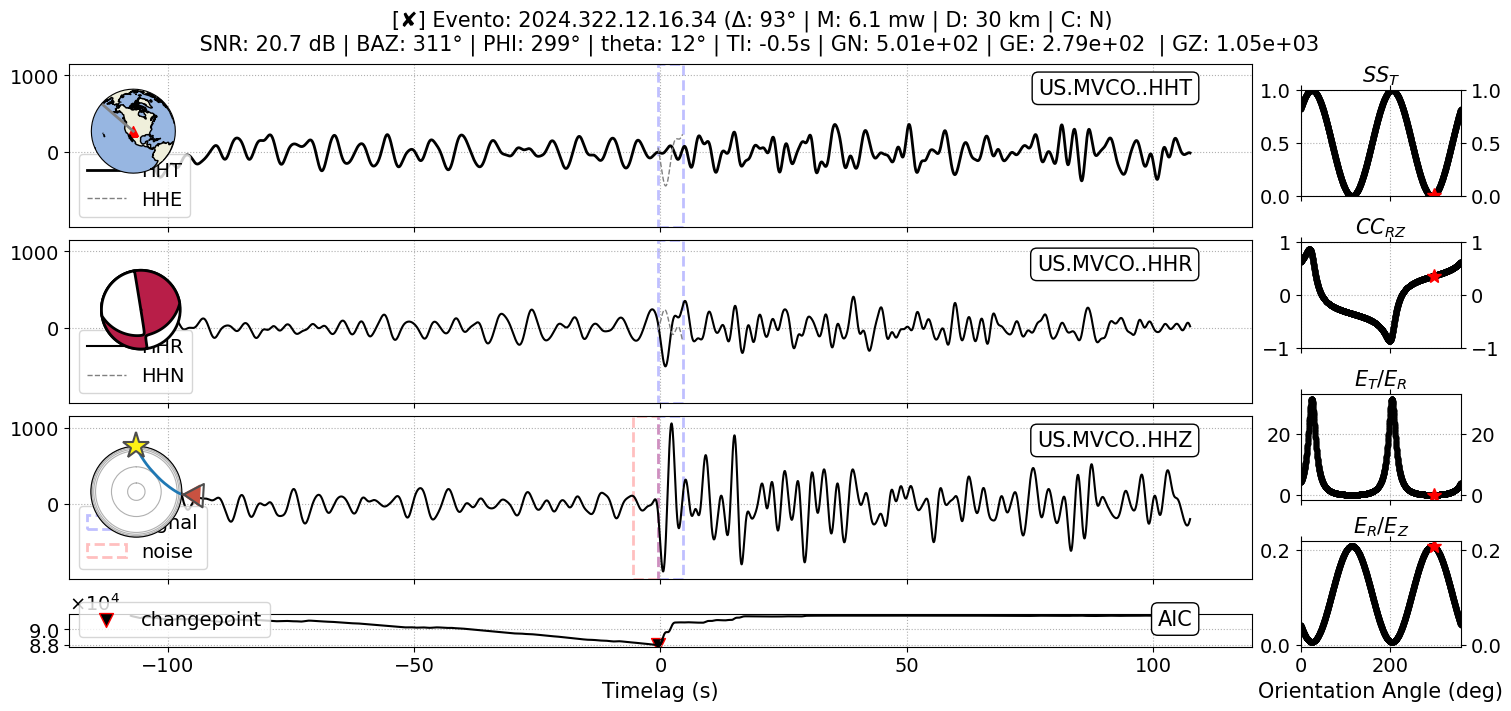

 59%|███████████████████████▌                | 654/1113 [01:53<01:22,  5.59it/s]

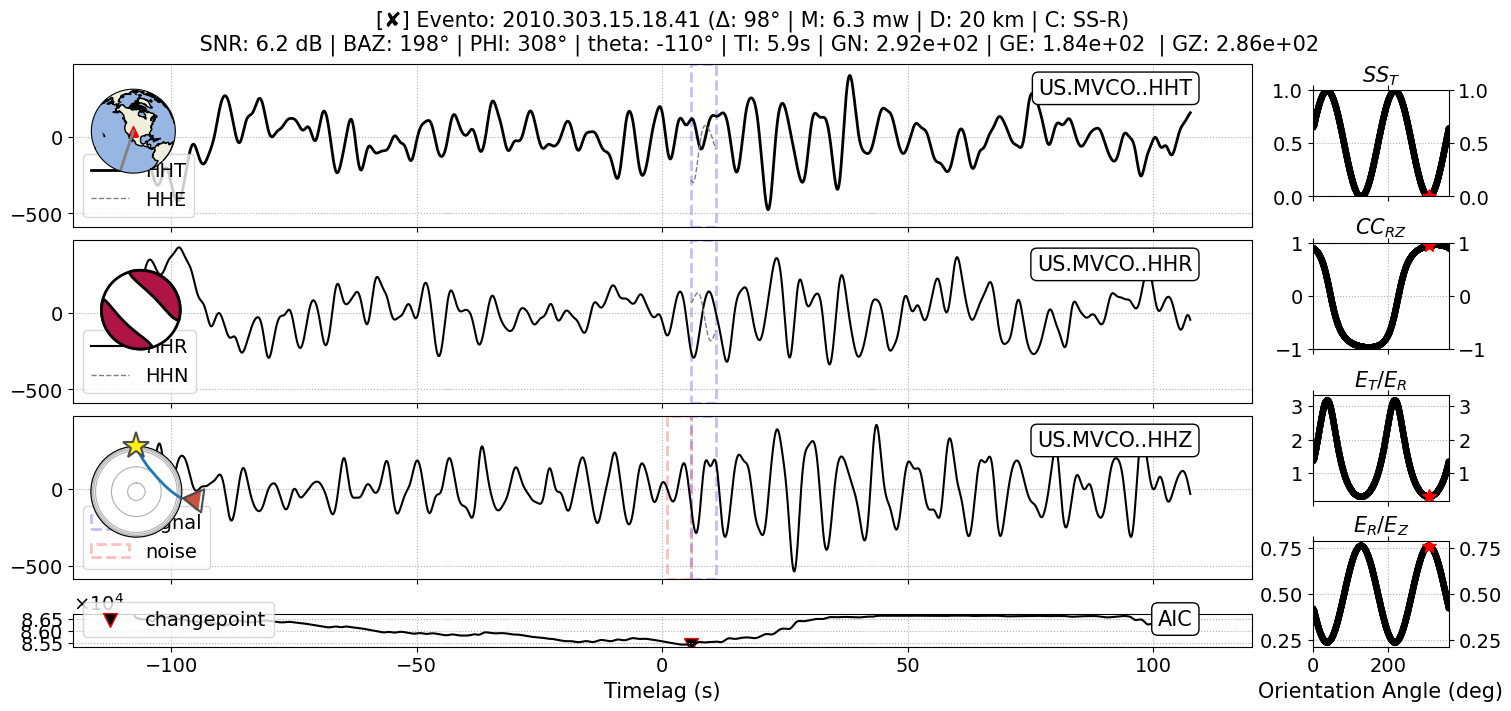

 61%|████████████████████████▎               | 676/1113 [01:57<01:36,  4.54it/s]

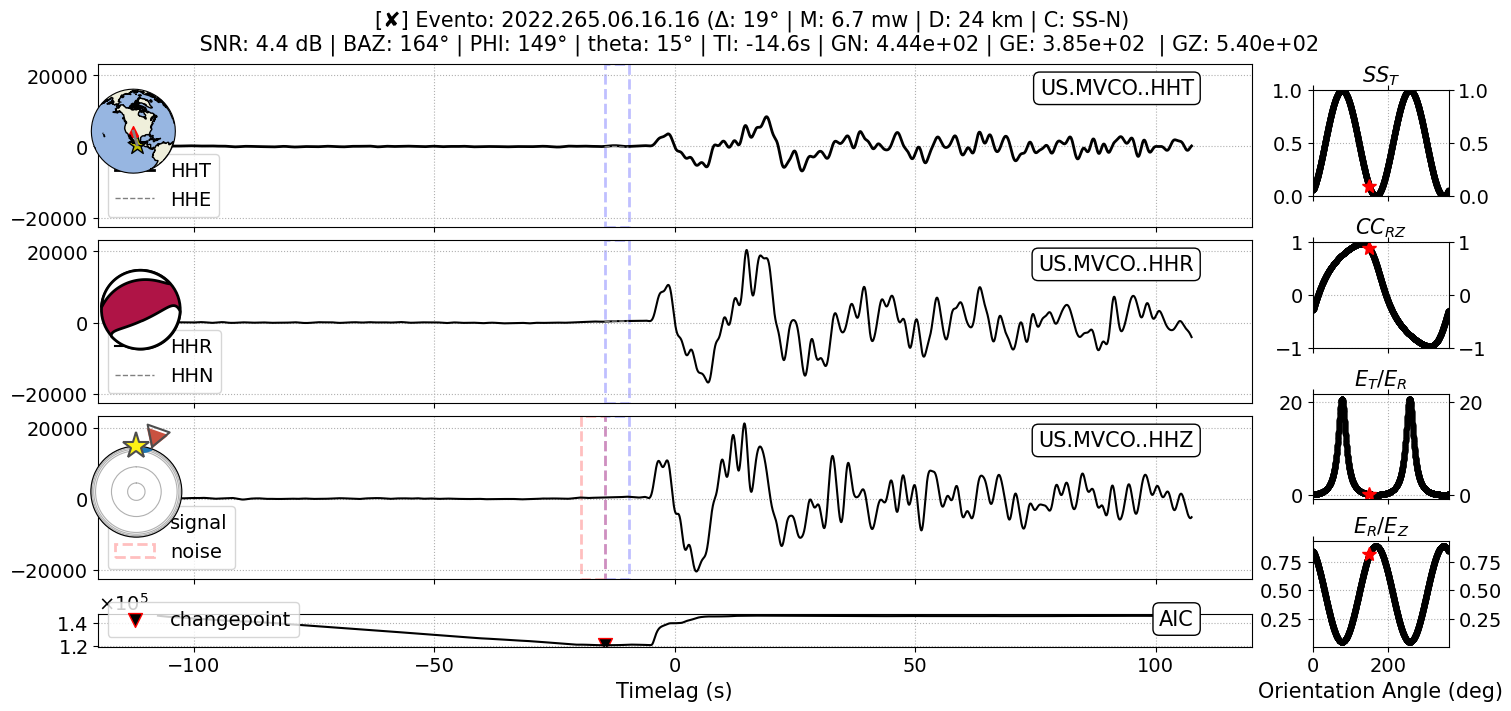

 63%|█████████████████████████               | 698/1113 [02:01<00:55,  7.45it/s]

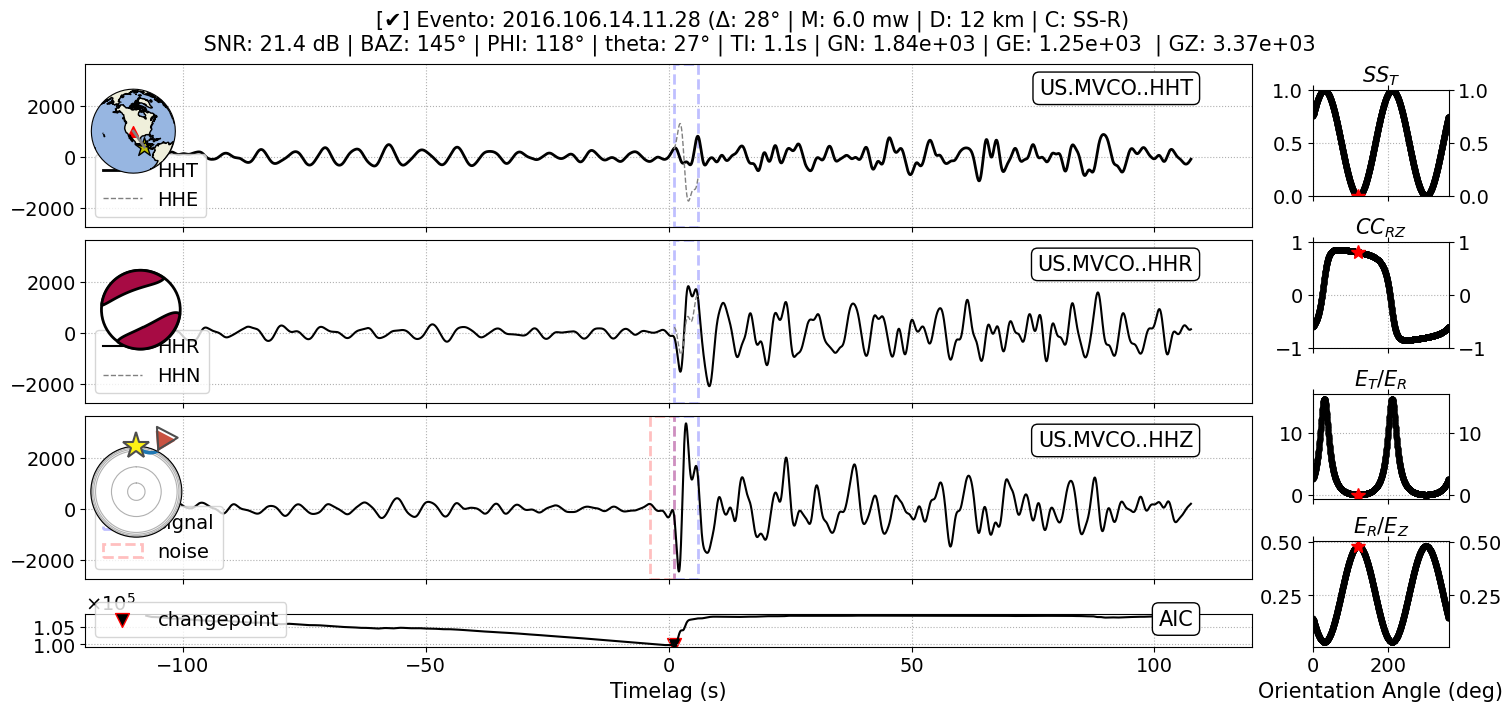

 64%|█████████████████████████▌              | 713/1113 [02:03<01:03,  6.30it/s]

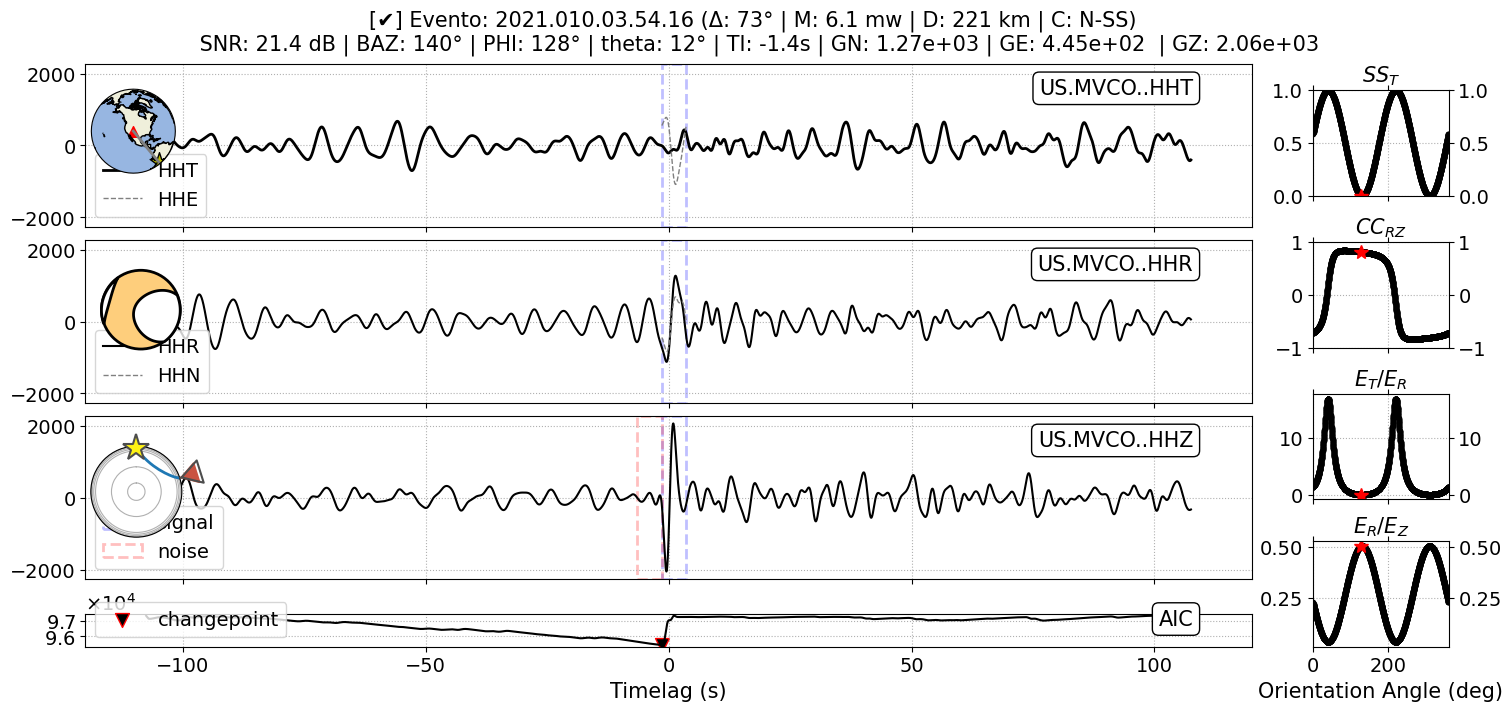

 66%|██████████████████████████▍             | 736/1113 [02:08<01:05,  5.74it/s]

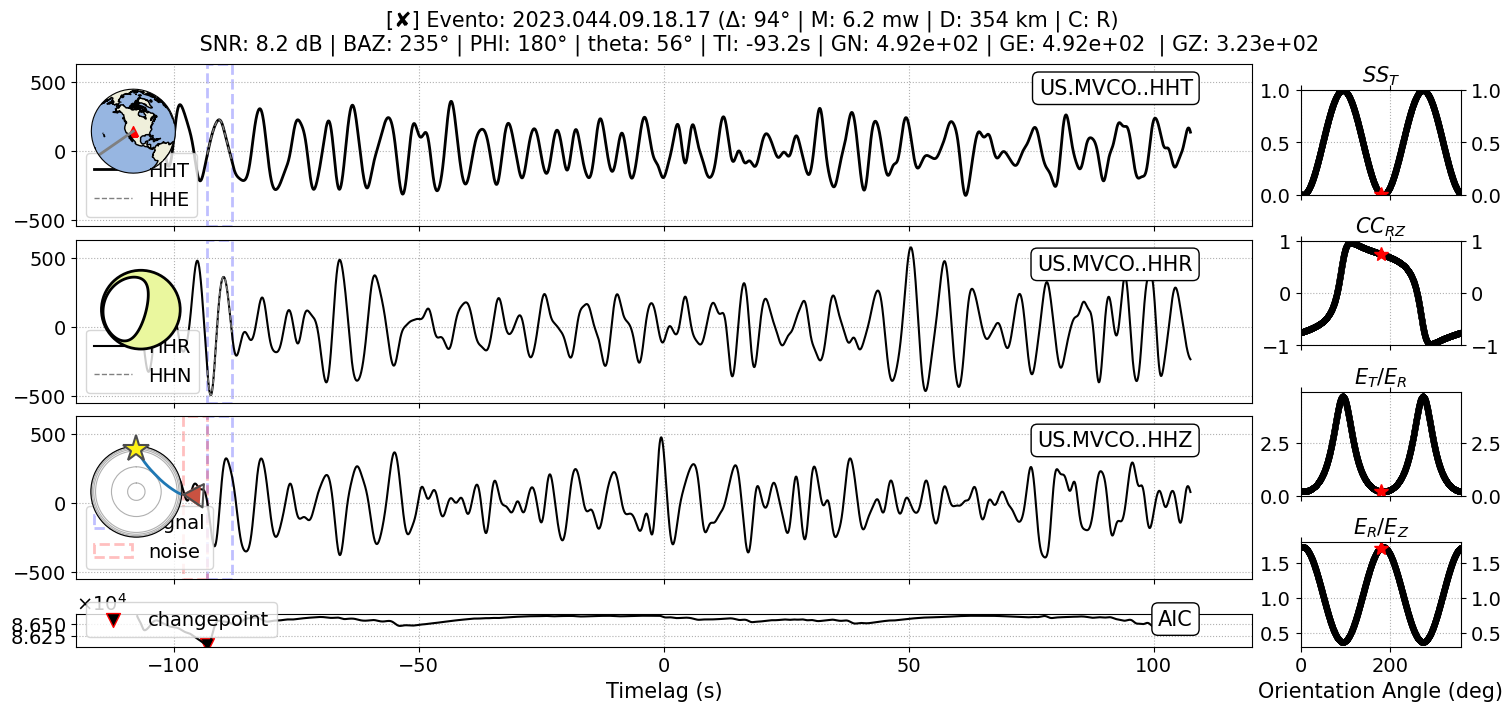

 68%|███████████████████████████▏            | 756/1113 [02:11<00:42,  8.41it/s]

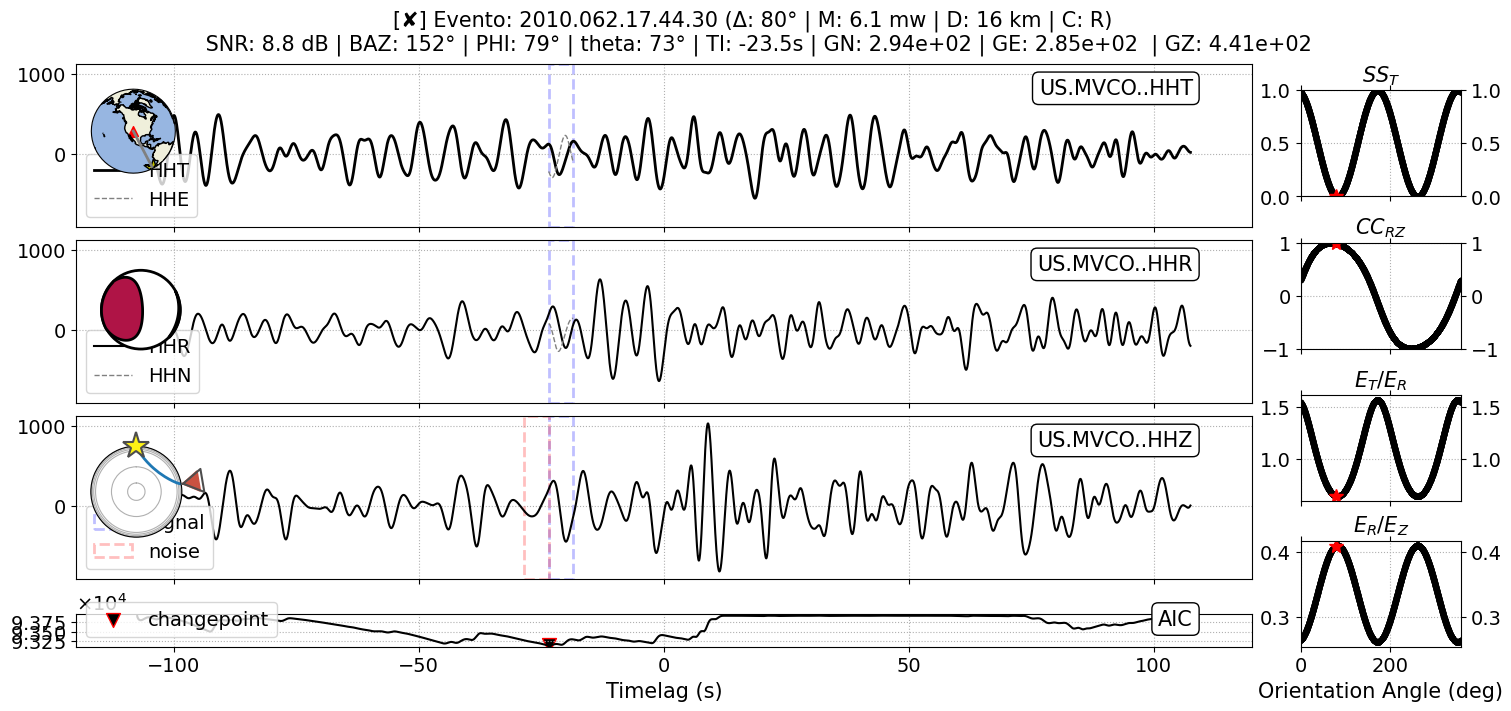

 69%|███████████████████████████▋            | 771/1113 [02:14<00:48,  7.01it/s]

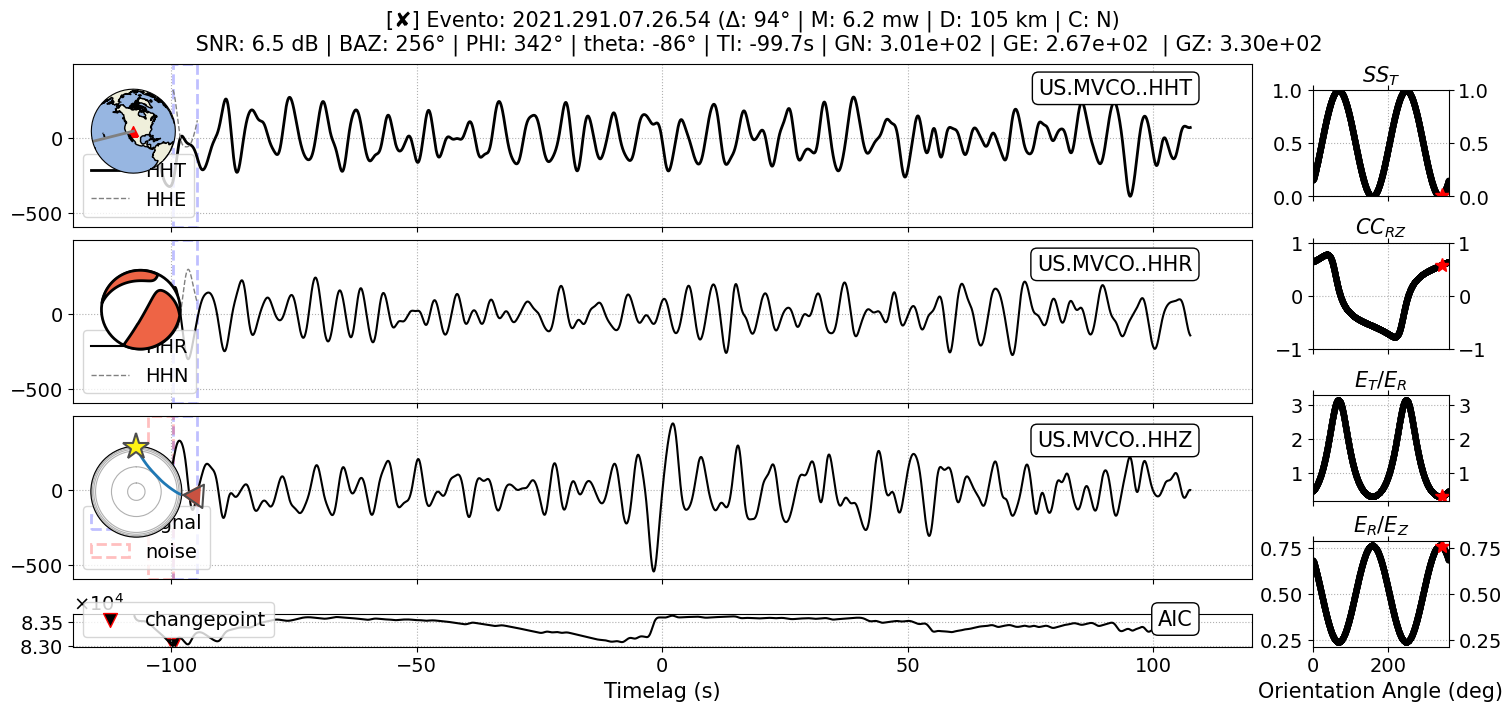

 71%|████████████████████████████▍           | 792/1113 [02:17<00:43,  7.46it/s]

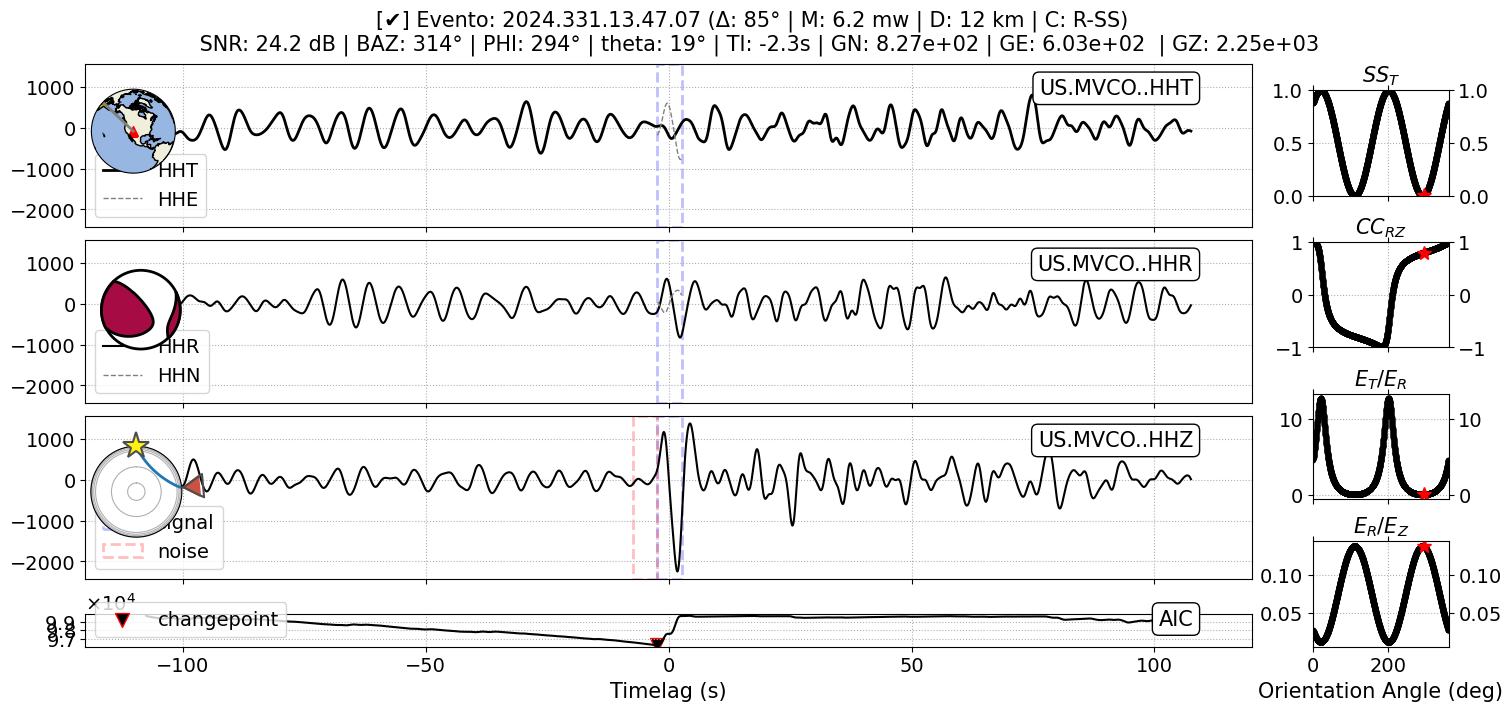

 72%|████████████████████████████▉           | 806/1113 [02:20<00:59,  5.12it/s]

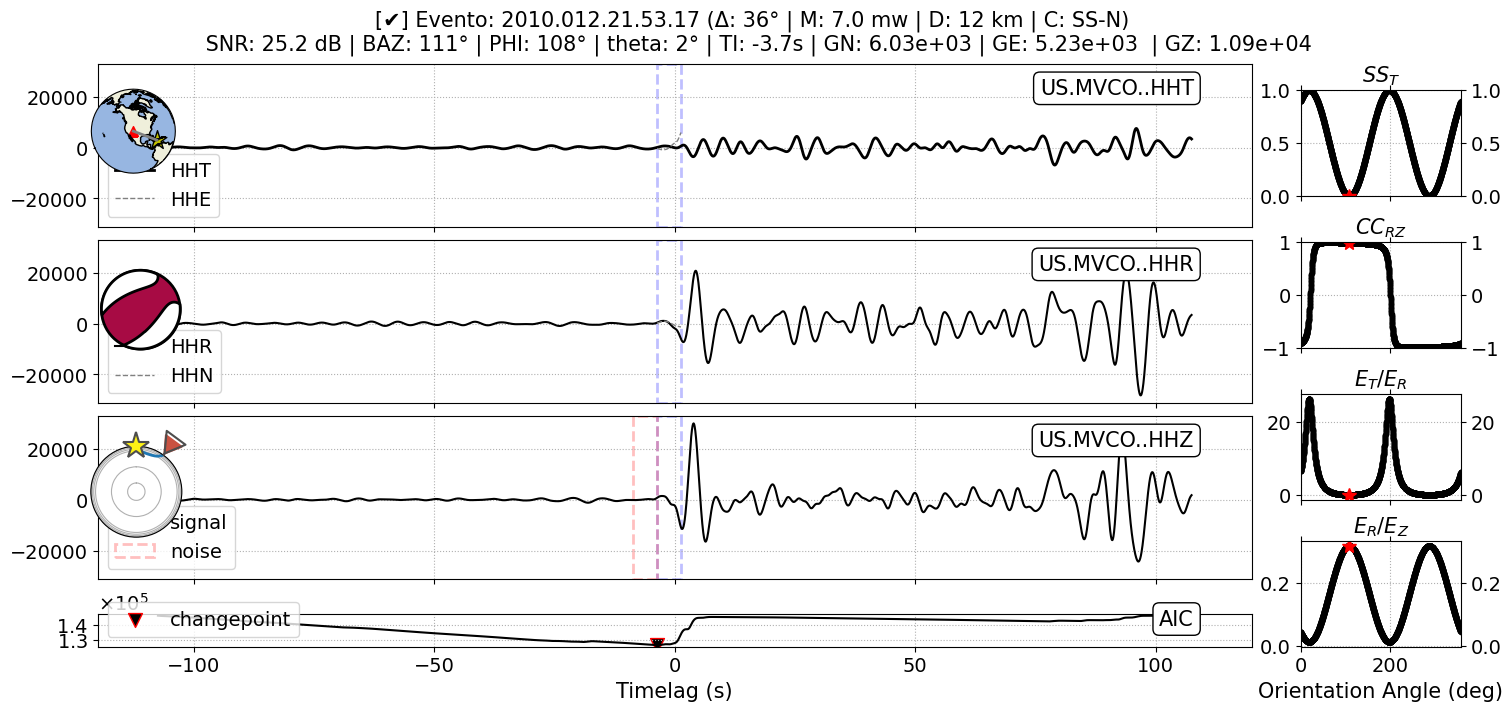

 75%|█████████████████████████████▊          | 830/1113 [02:24<00:27, 10.33it/s]

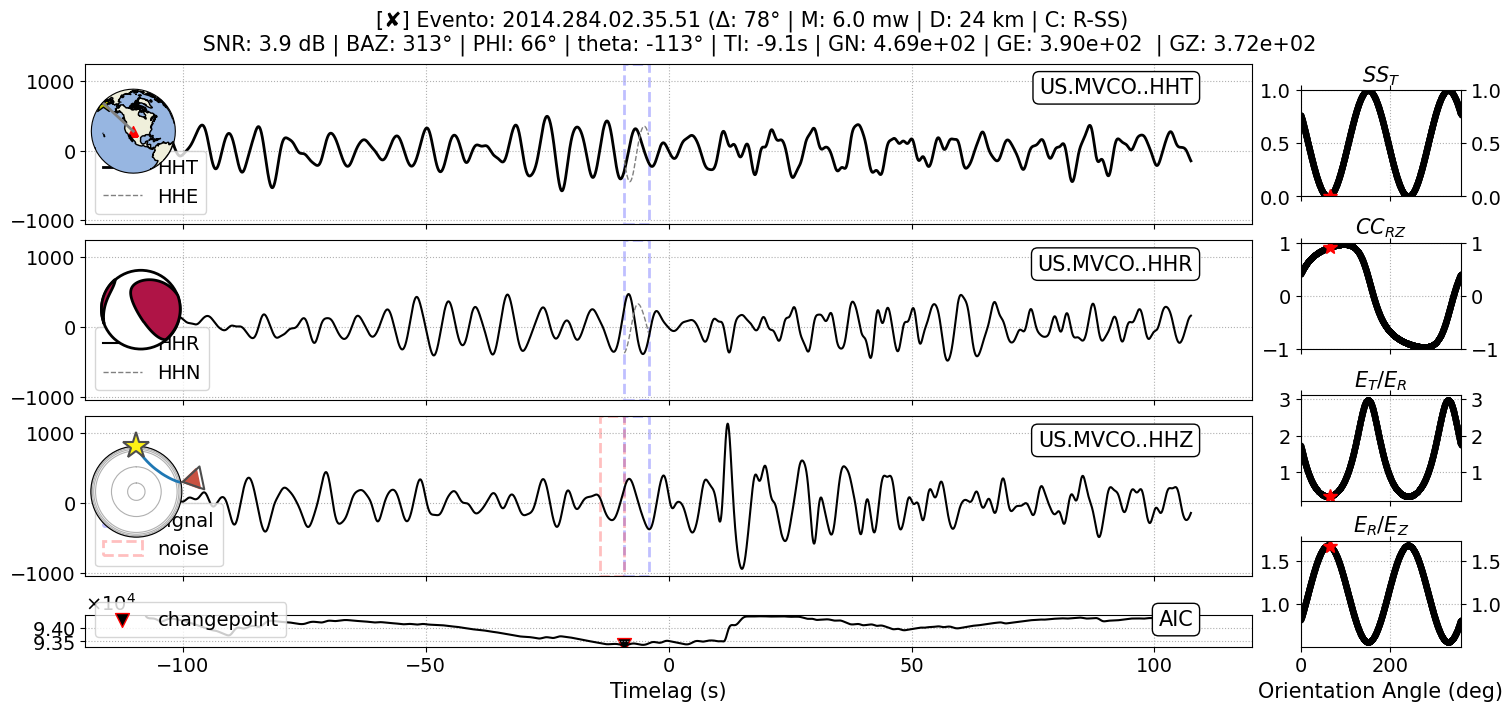

 76%|██████████████████████████████▌         | 850/1113 [02:27<00:30,  8.67it/s]

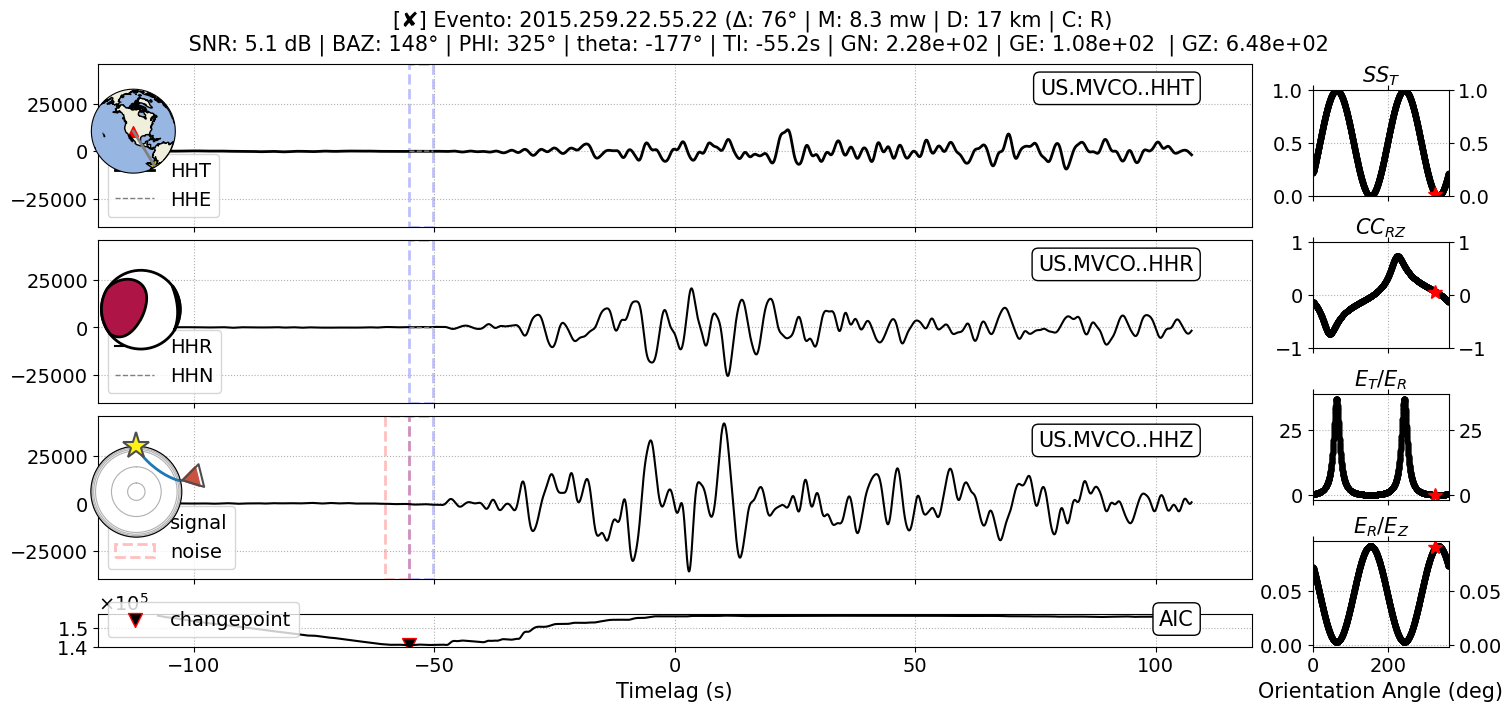

 78%|███████████████████████████████▎        | 872/1113 [02:31<00:35,  6.82it/s]

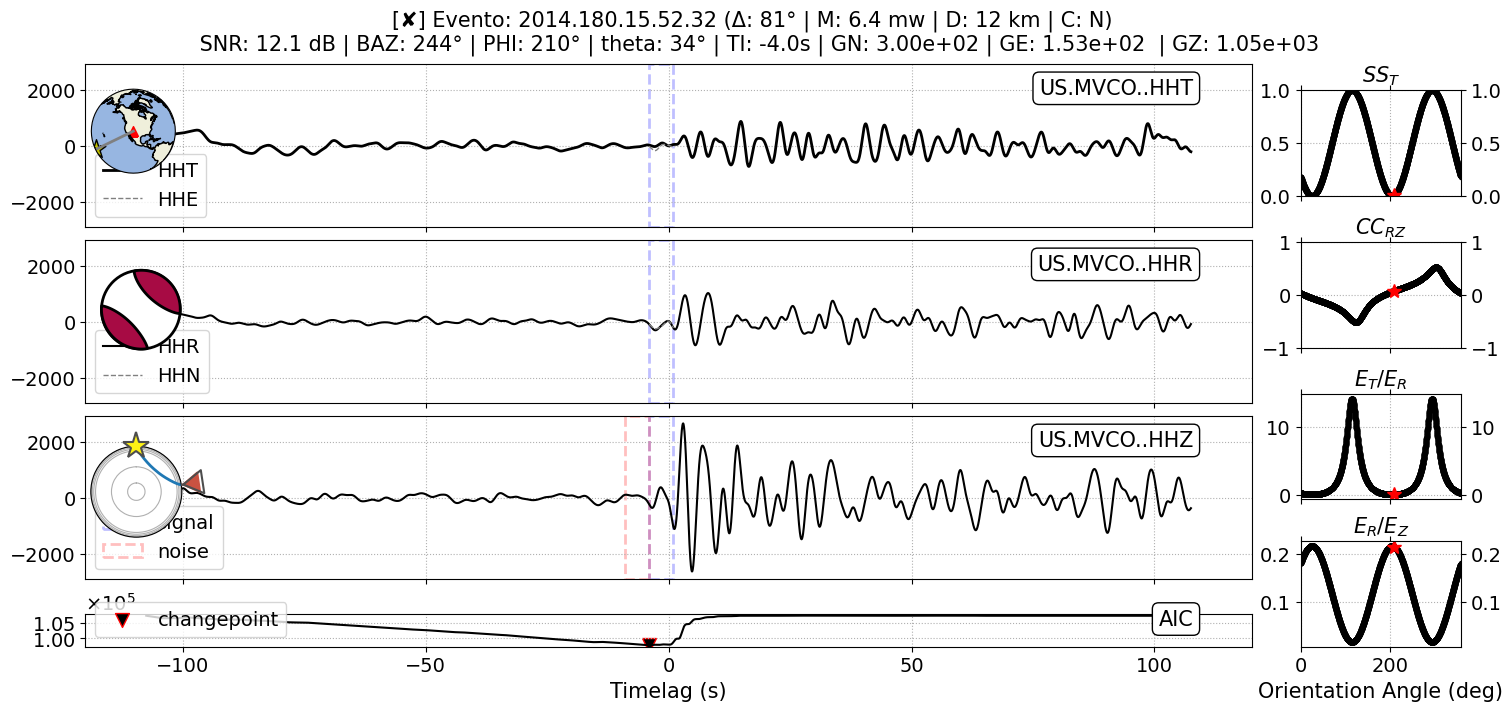

 80%|███████████████████████████████▉        | 890/1113 [02:34<00:28,  7.69it/s]

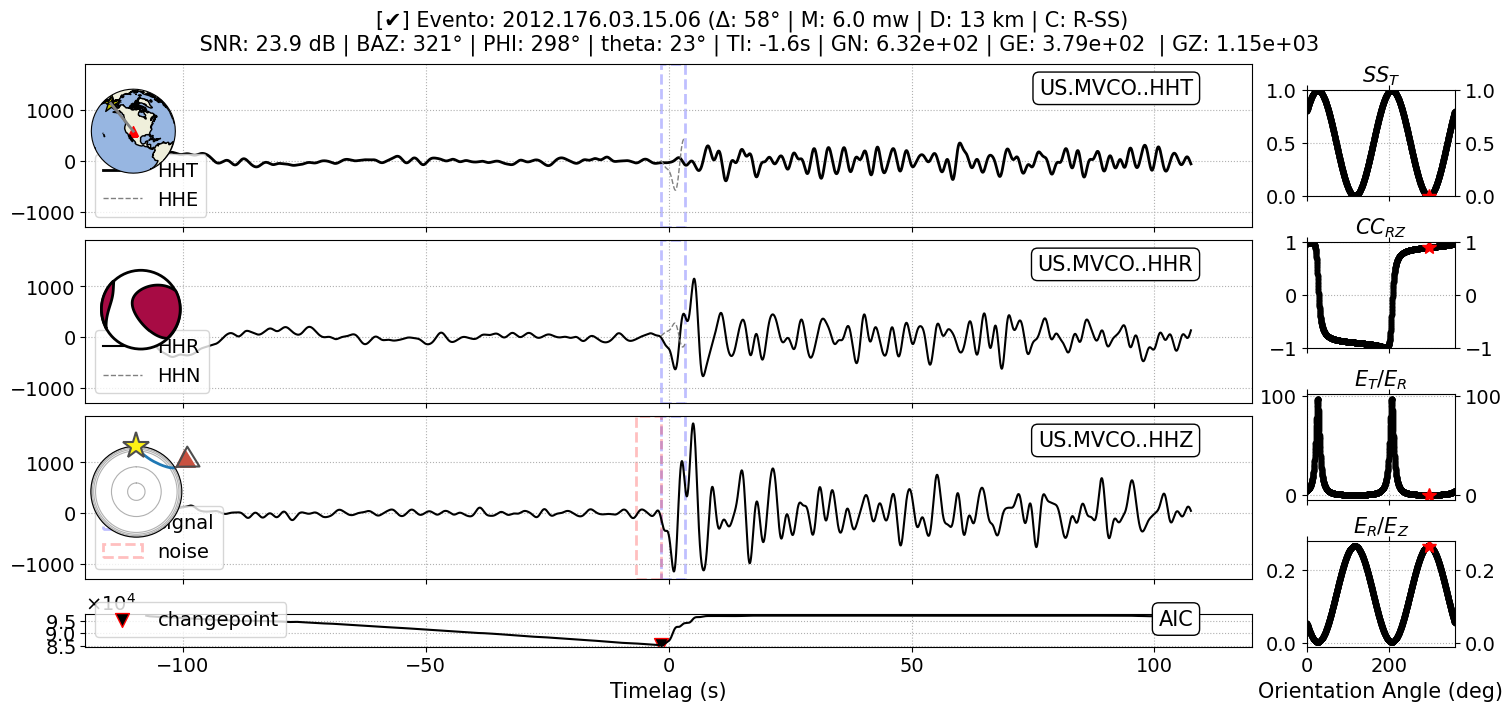

 82%|████████████████████████████████▋       | 908/1113 [02:38<00:27,  7.44it/s]

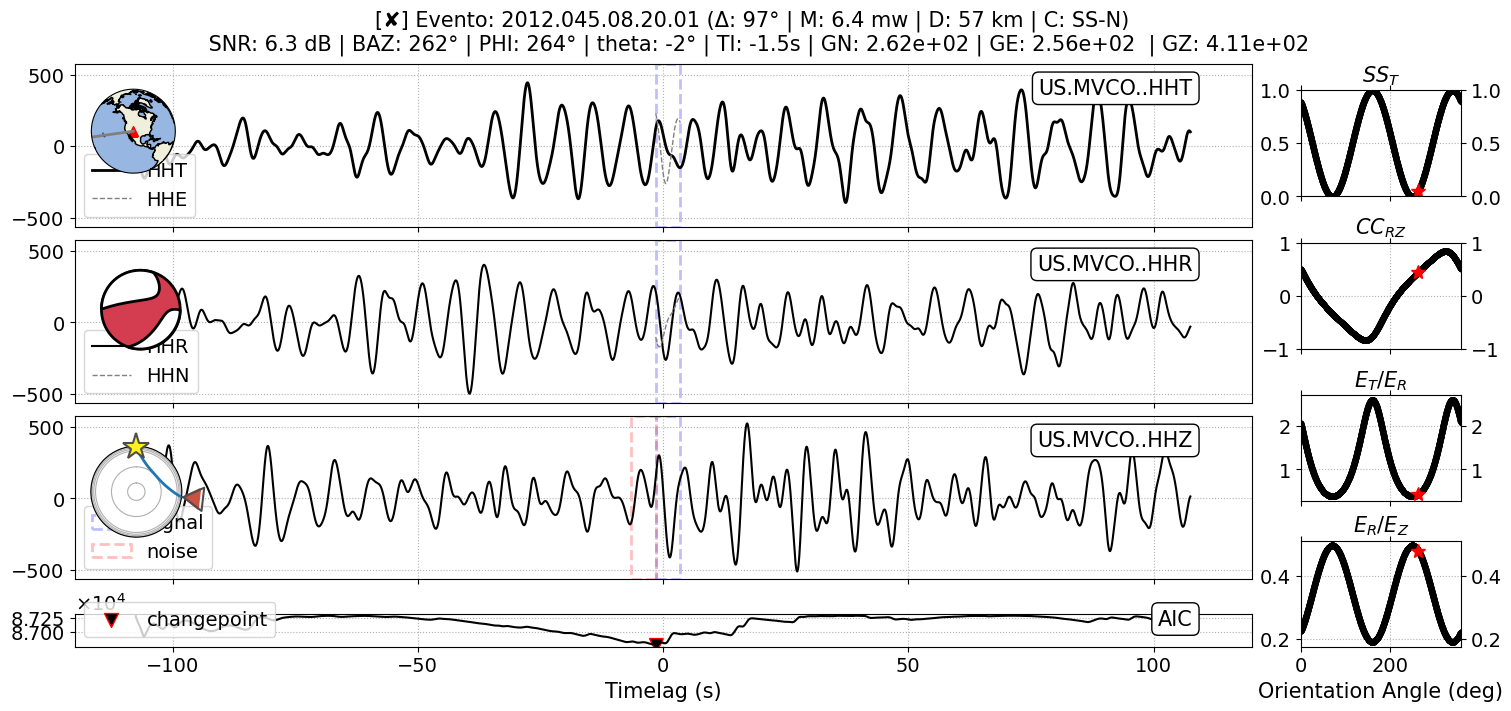

 83%|█████████████████████████████████▏      | 923/1113 [02:41<00:34,  5.52it/s]

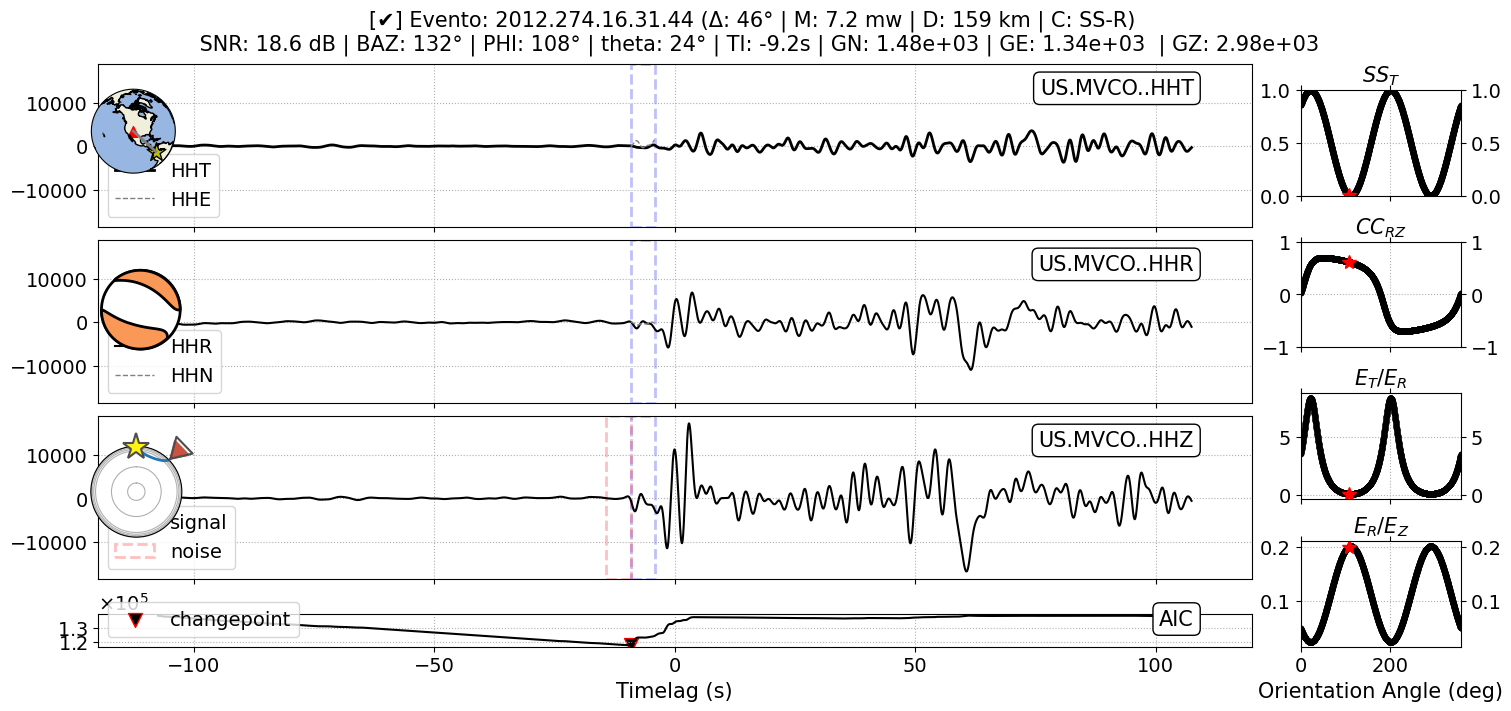

 85%|█████████████████████████████████▉      | 943/1113 [02:44<00:42,  4.04it/s]

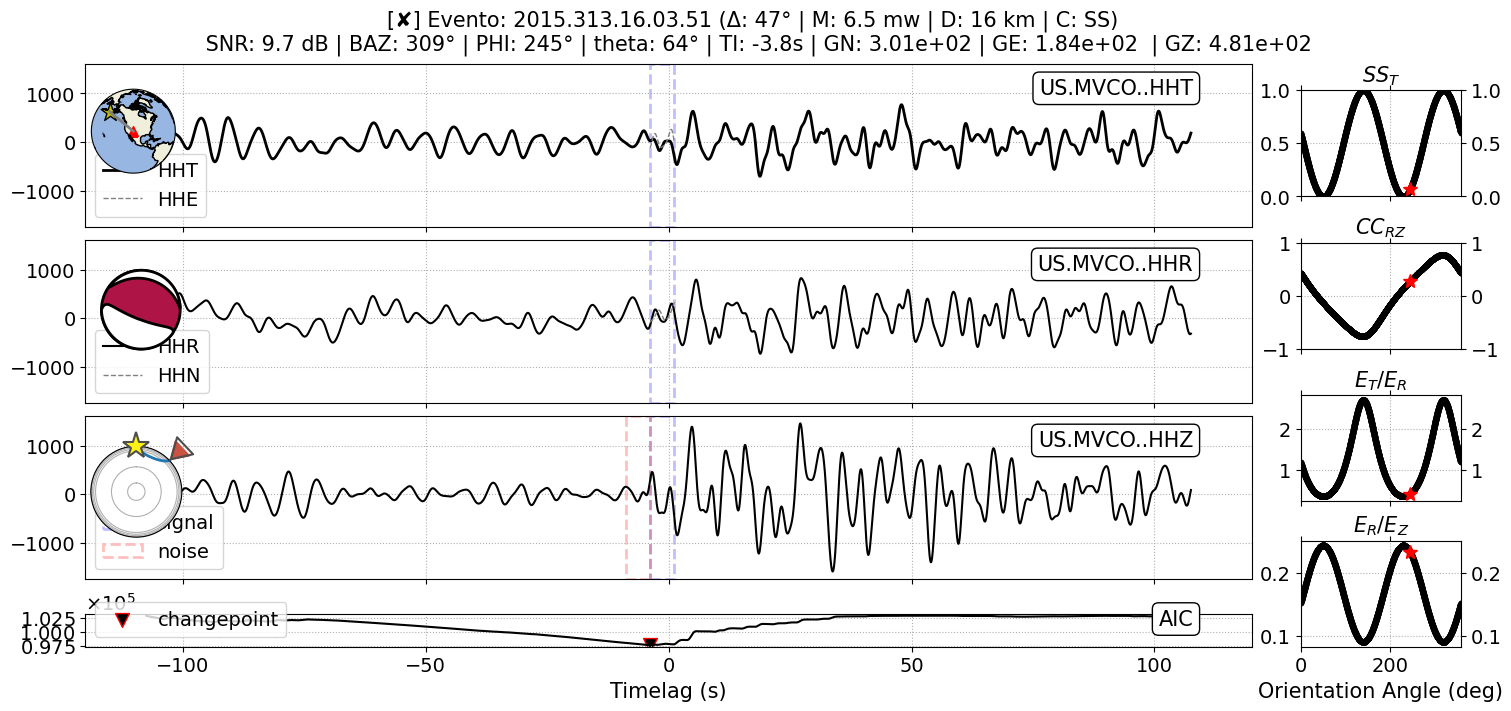

 87%|██████████████████████████████████▌     | 963/1113 [02:48<00:30,  4.96it/s]

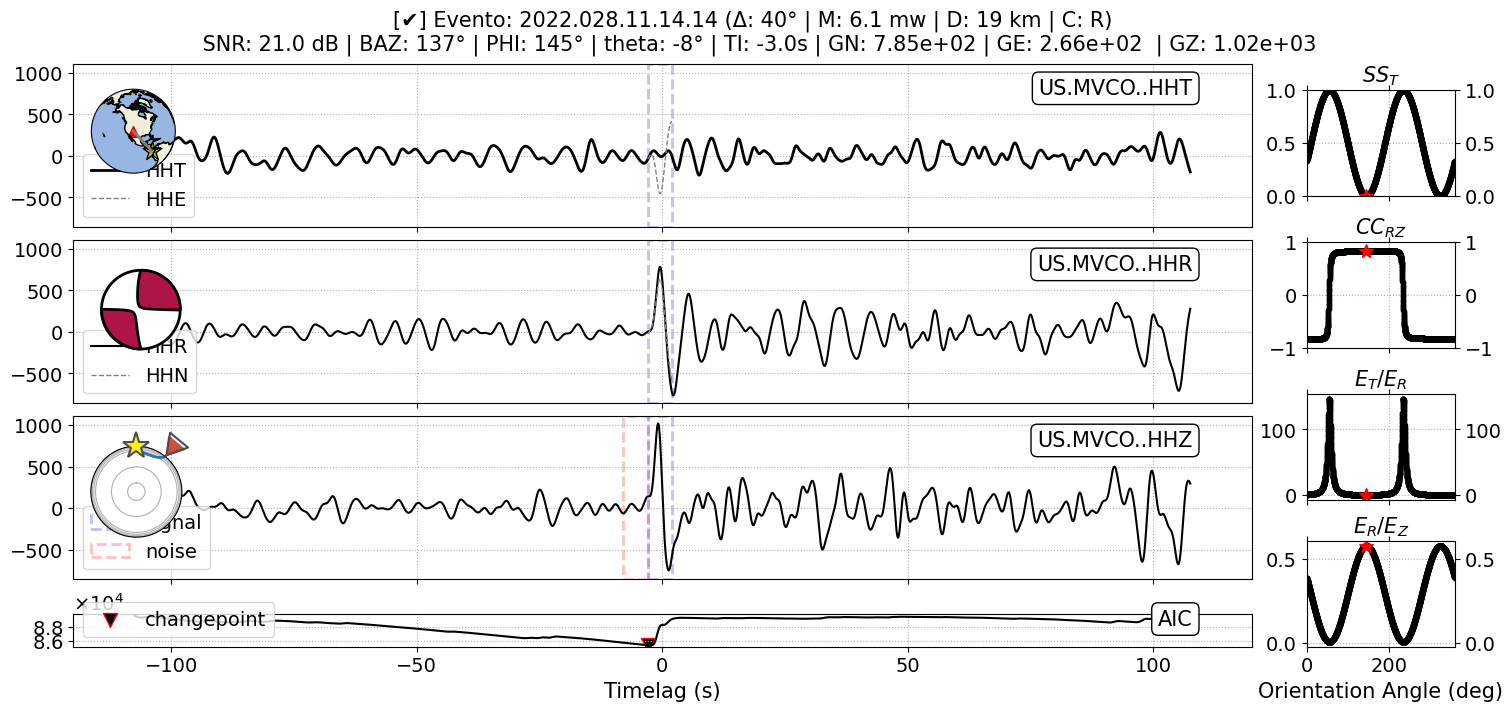

 88%|███████████████████████████████████▎    | 984/1113 [02:51<00:26,  4.93it/s]

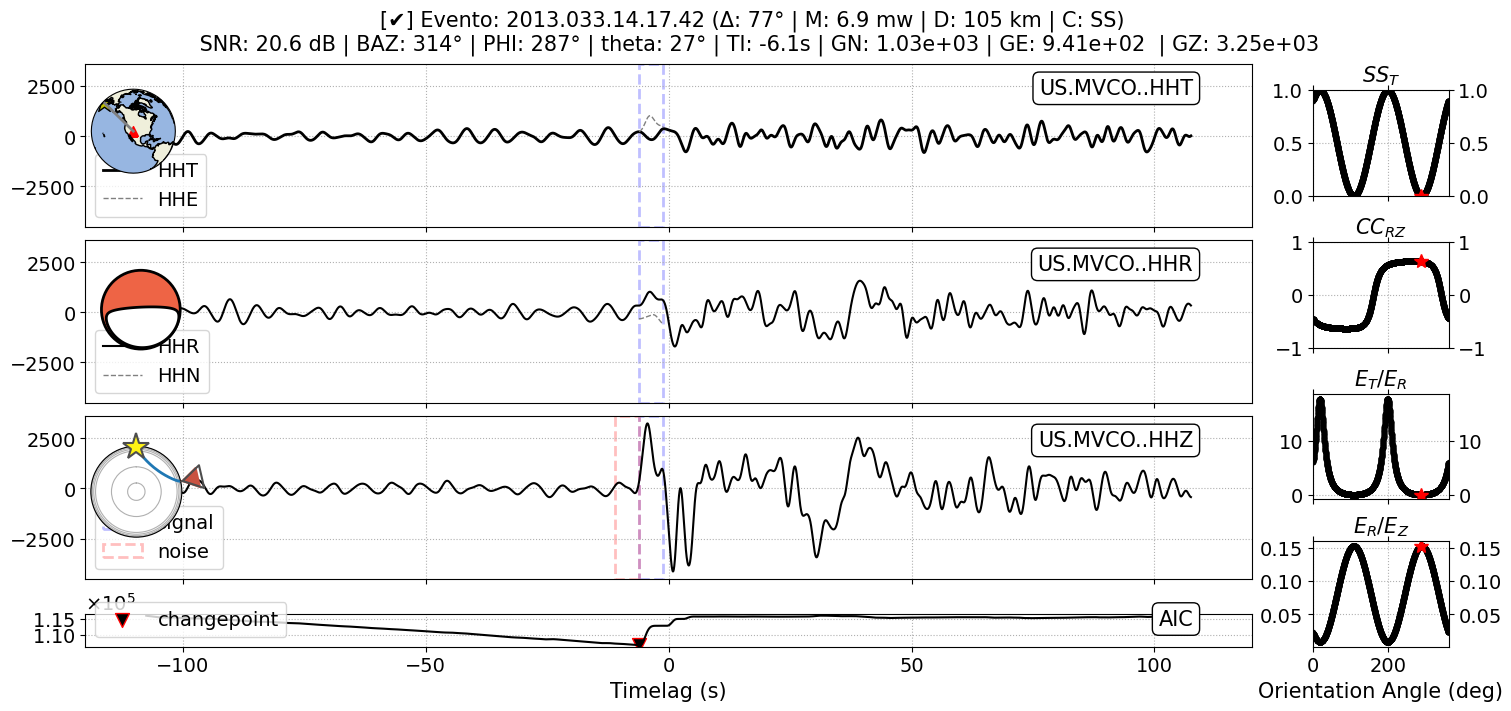

 90%|███████████████████████████████████    | 1001/1113 [02:54<00:21,  5.11it/s]

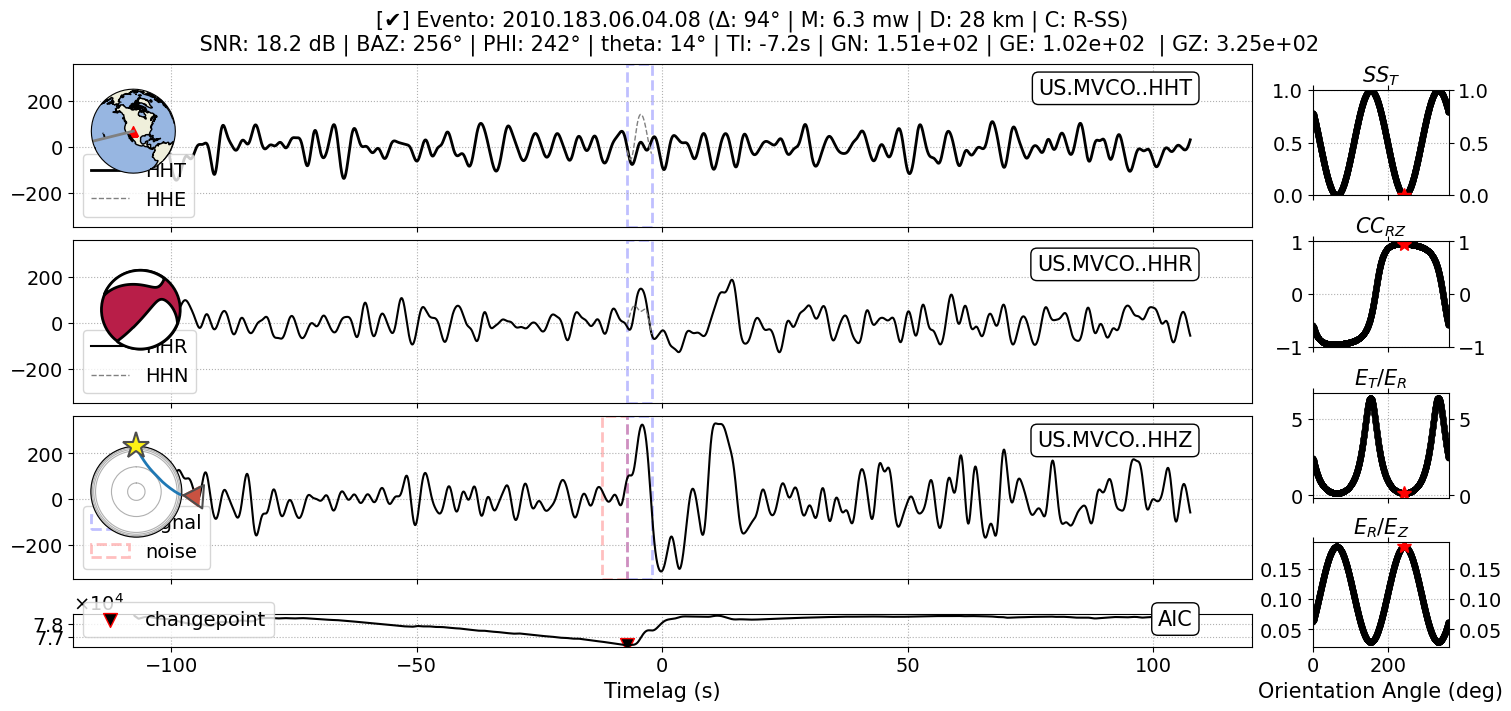

 92%|███████████████████████████████████▊   | 1021/1113 [02:58<00:15,  5.83it/s]

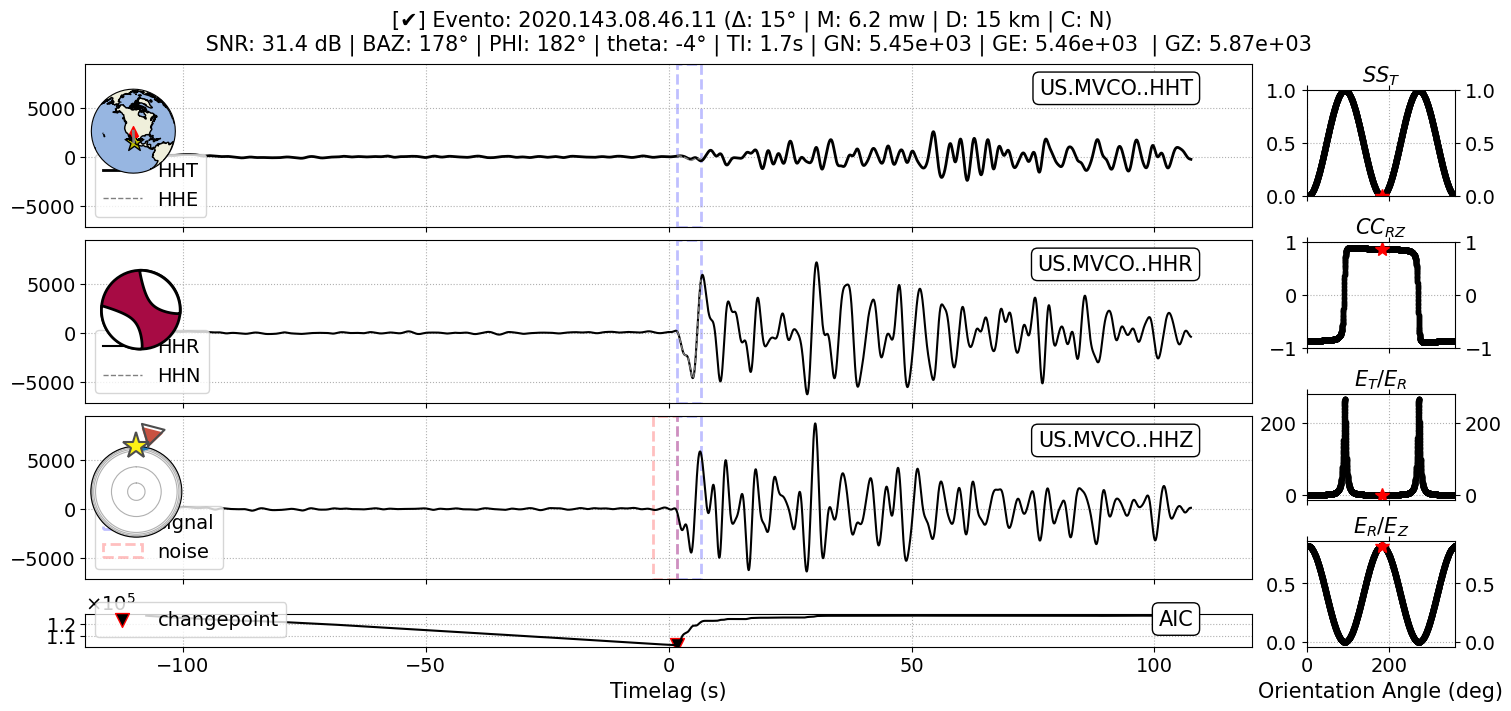

 94%|████████████████████████████████████▌  | 1044/1113 [03:02<00:12,  5.36it/s]

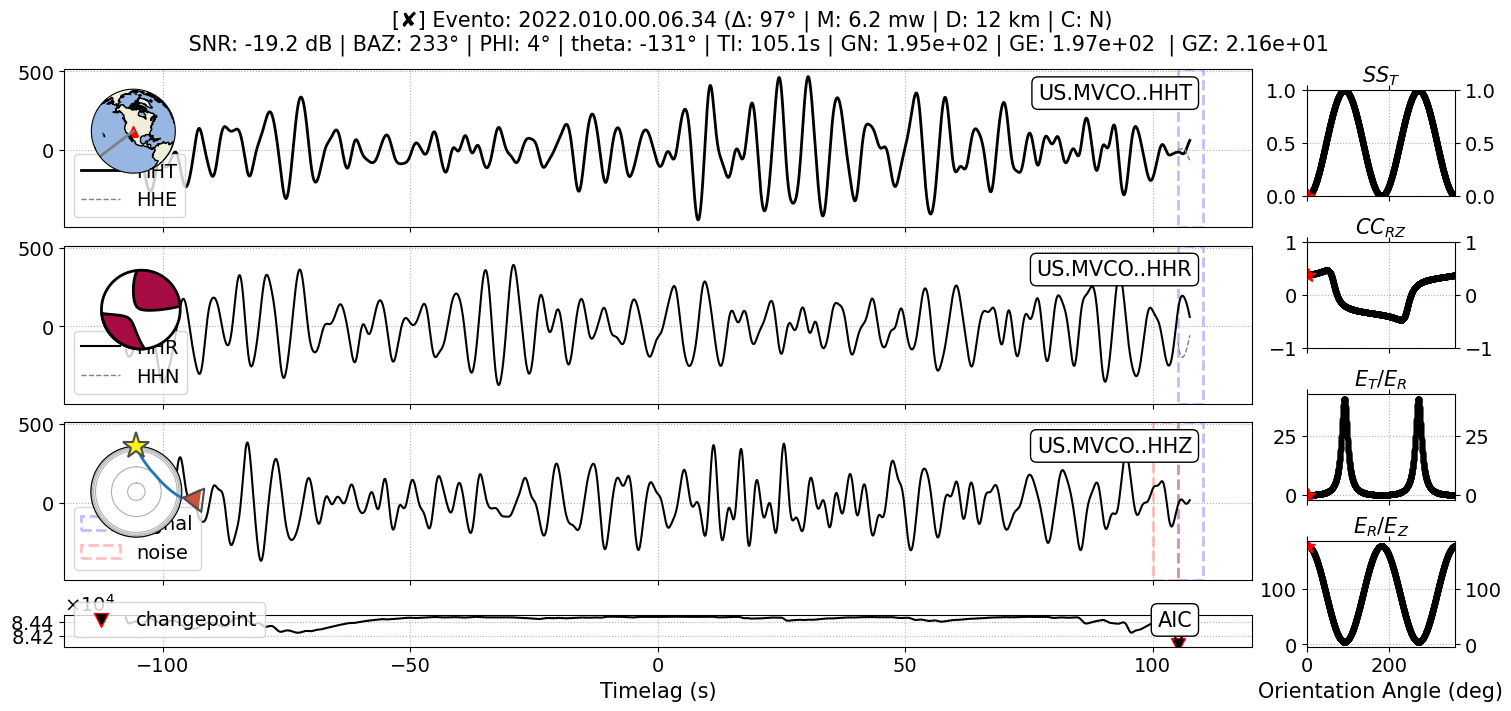

 96%|█████████████████████████████████████▍ | 1067/1113 [03:06<00:07,  6.25it/s]

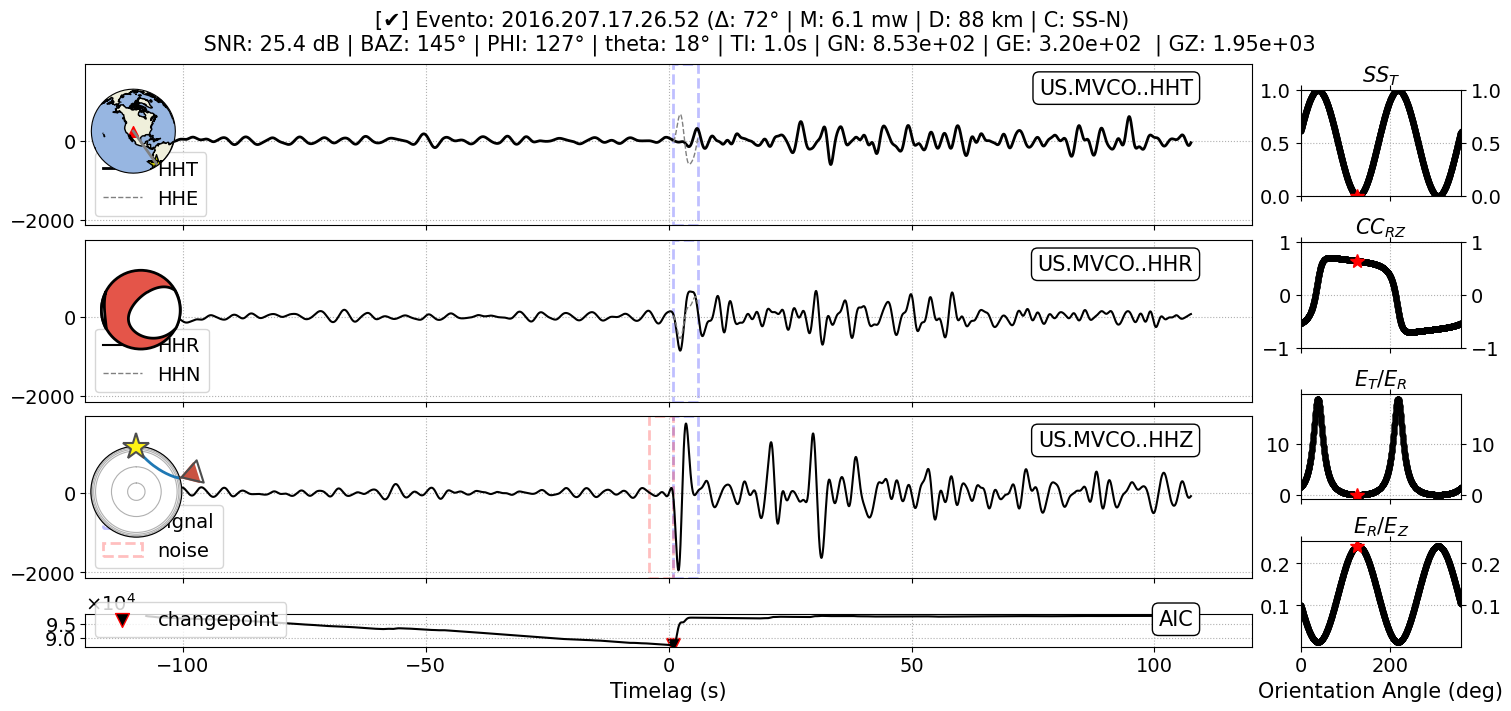

 97%|██████████████████████████████████████ | 1085/1113 [03:10<00:05,  4.86it/s]

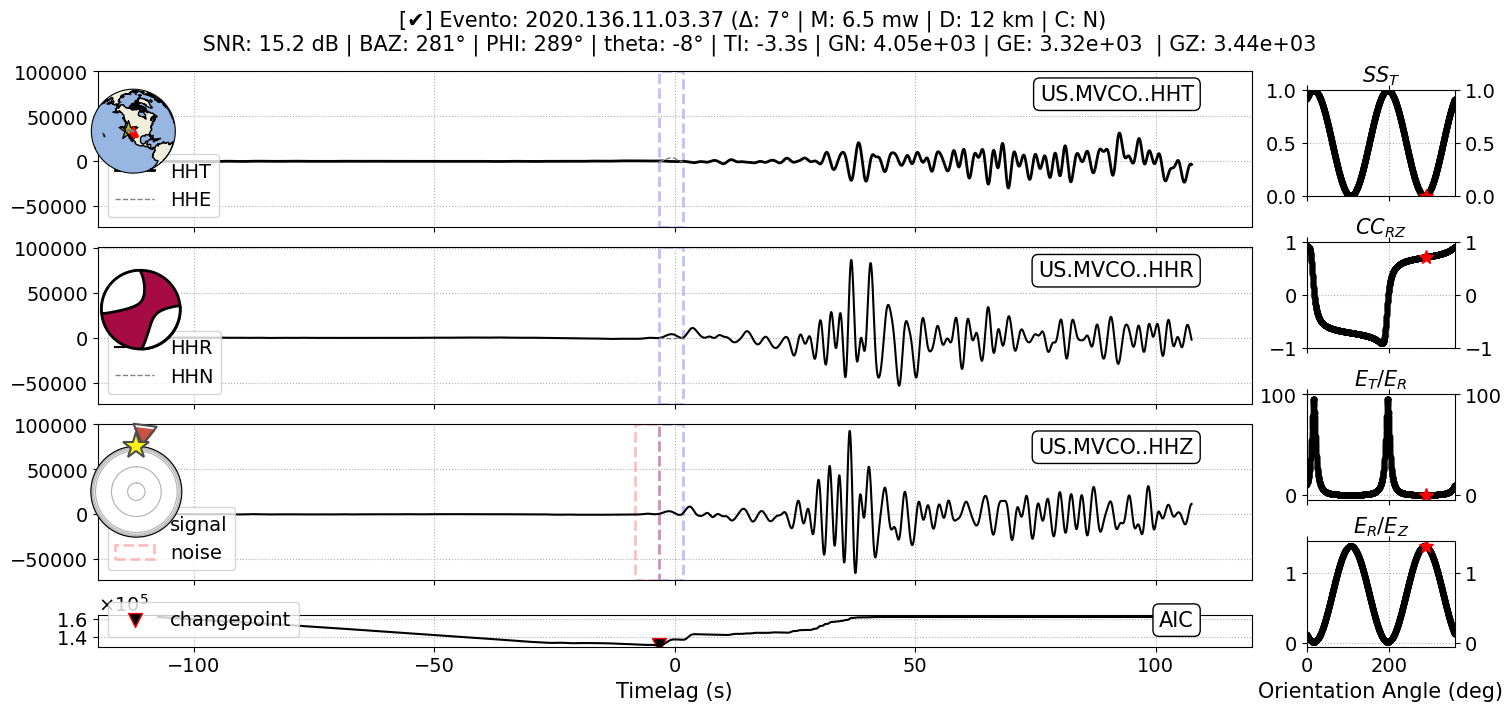

100%|███████████████████████████████████████| 1113/1113 [03:13<00:00,  5.74it/s]




--- 4.01 execution time (min) ---




In [5]:
start_time = time.time()

for sta in STATIONS_lst:
    print('Processsing station: ',sta)
    FEATHER_FILES_LST = [pd.read_feather(i) for i in glob.glob(SSPARQ_OUTPUT+'FEATHER_FILES/METRICS/*'+sta+'/*')]
    station_df = pd.concat(FEATHER_FILES_LST)

    with Pool(processes=20) as p:
        max_ = len(station_df)
        with tqdm(total=max_) as pbar:
            for result in p.imap_unordered(plotting_event_orientation,station_df.iterrows()):
                pbar.update()

print('\n')
print("--- %.2f execution time (min) ---" % ((time.time() - start_time)/60))
print('\n')